<h1><center> Neural Network</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

Case Study 12

Given the following paper: https://arxiv.org/pdf/1402.4735.pdf

Build a replica Neural Network with the paper’s architecture using Tensorflow.  If possible begin to train on the data located here: https://archive.ics.uci.edu/ml/datasets/HIGGS.  How close can you get to the original results?
To facilitate quicker training you may increase the batch size temporarily (this has a small impact on final result, but can speed you calculations significantly).  You do not need to train a final result using the paper’s parameters, only the code for your model is required in your final submission.

Include in your report:
Based on the class notes and discussion suggest improvements to the procedure.  What are standard practices now versus when this paper was written?  What kind of improvements do they provide?
How would you quantify if your result duplicated the paper’s?


# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

* Data Set Information:

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.


* Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. For more detailed information about each feature see the original paper.



[Back to Contents](#Contents)

# Background




[Back to Contents](#Contents)

# Methods


[Back to Contents](#Contents)

# Results



[Back to Contents](#Contents)

# Conclusion



[Back to Contents](#Contents)

# References

[1] Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)

[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [1]:
#!pip install ml_metrics 
#!pip install pymc 
#!pip install pymc3

### Import Packages

In [27]:
import tensorflow as tf;print(tf.__version__)
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd ;print(pd.__version__)
import numpy as np;print(np.__version__)
from sklearn.model_selection import train_test_split
from time import time
from tensorflow.keras.callbacks import TensorBoard


import csv
import seaborn as sns;
import matplotlib.pyplot as plt


import warnings

warnings.simplefilter('ignore')

%matplotlib inline
tb = TensorBoard(log_dir=f"logs\\{time()}")


1.13.1
0.24.2
1.15.4


### Import data and exploring

In [3]:
# please download the data from https://archive.ics.uci.edu/ml/datasets/HIGGS and save it into your local folder as it is big.
df_HIGGS = pd.read_csv("D:\MyWork\SMU\MSDS7333\CaseStudy12\HIGGS.csv")

In [4]:
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
df_HIGGS.columns=cols

In [5]:
df_HIGGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [6]:
df_HIGGS.head()

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
1,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
2,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
3,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
4,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [16]:
y= np.array(df_HIGGS['class label'])

X = df_HIGGS[features]


## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)


scaled_train_df = pd.DataFrame(scaled_train, columns=features)

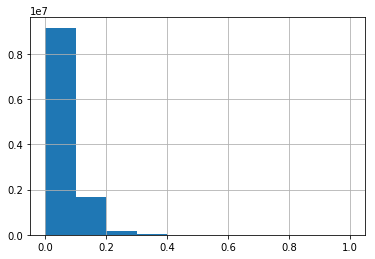

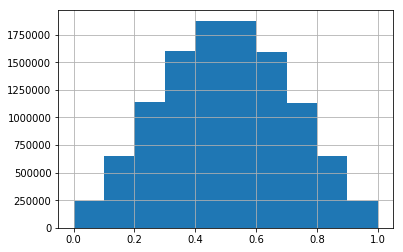

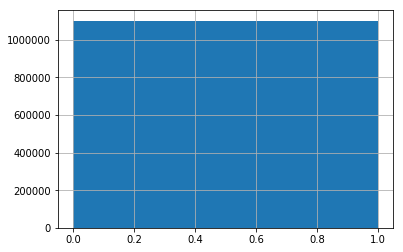

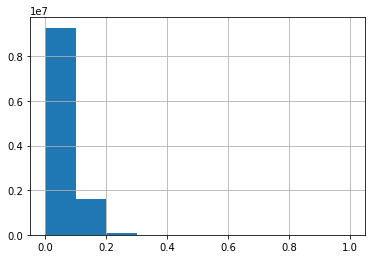

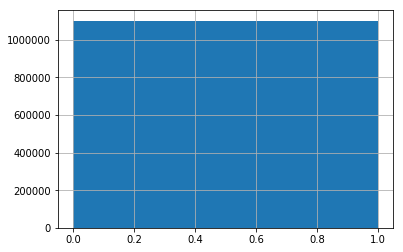

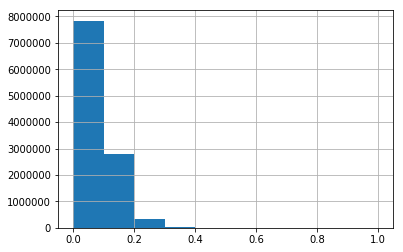

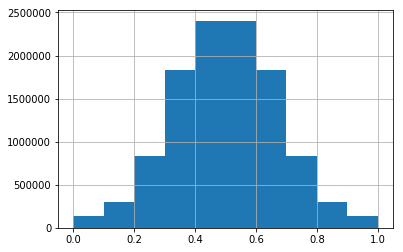

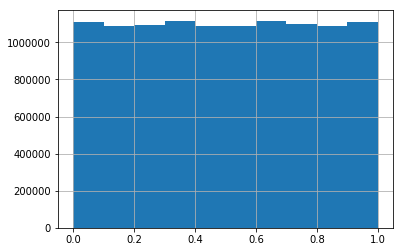

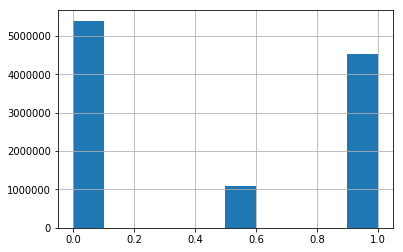

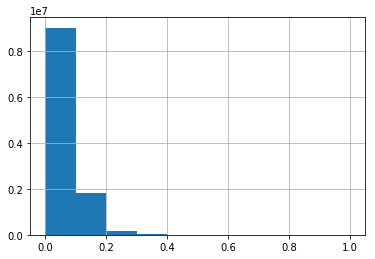

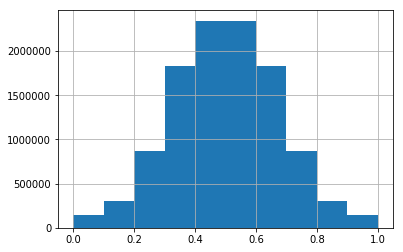

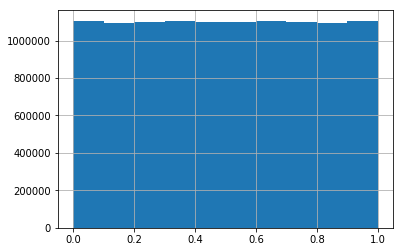

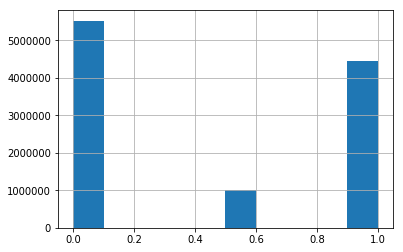

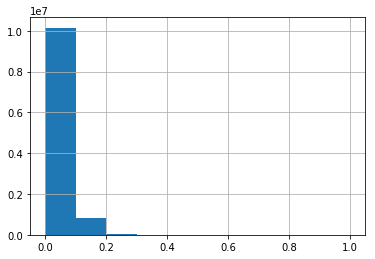

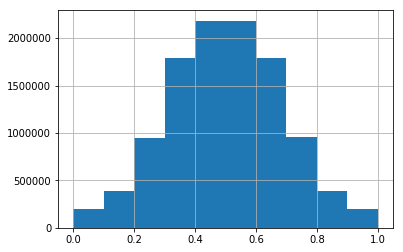

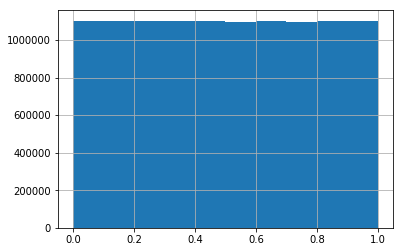

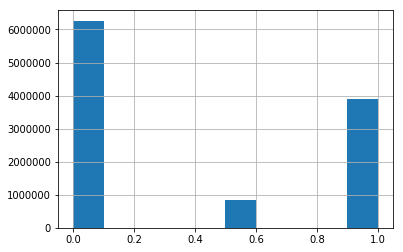

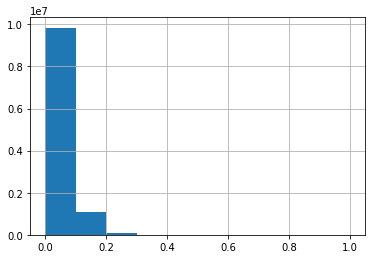

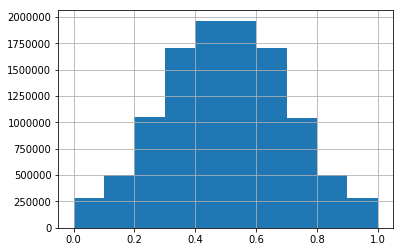

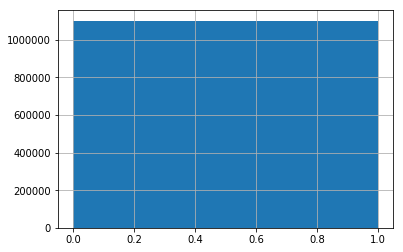

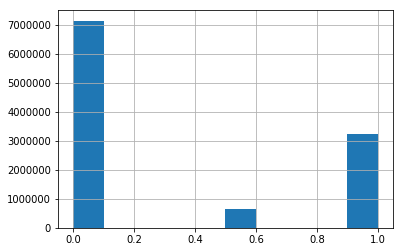

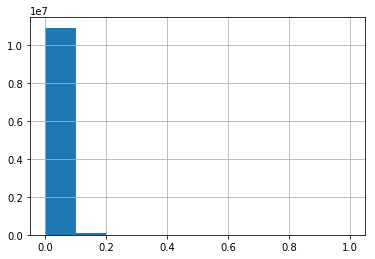

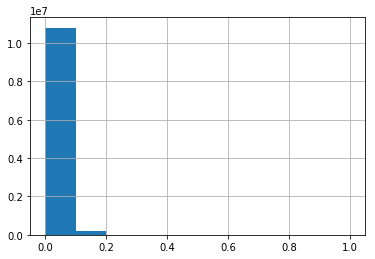

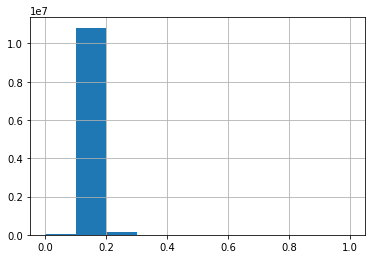

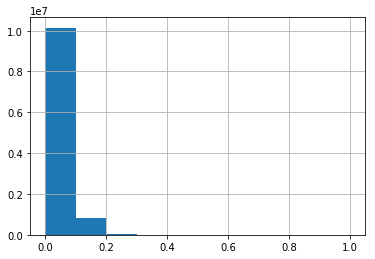

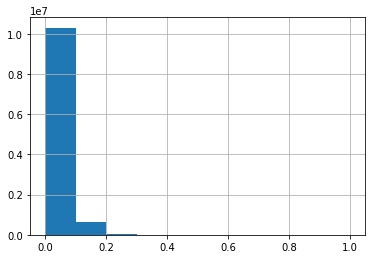

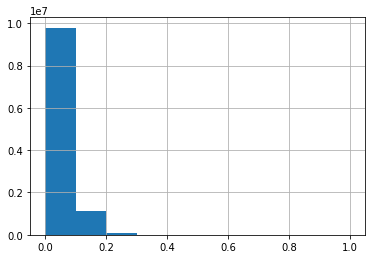

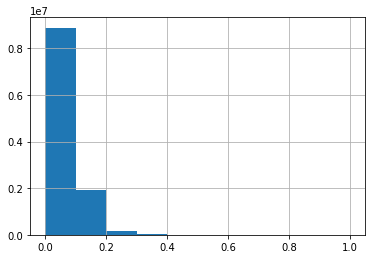

In [18]:
for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

## Model

In [19]:
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(3 ,activation='sigmoid'),)



## Compile Model

In [20]:


model.compile(optimizer=tf.train.GradientDescentOptimizer(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Fit the Model

In [25]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=4, callbacks=[tb])

Train on 8799999 samples, validate on 2200000 samples
Epoch 1/10
  72460/8799999 [..............................] - ETA: 1:47:27 - loss: 0.2410 - mean_squared_error: 0.2410

In [ ]:
np.argmax(model.predict(x_test),axis=1)

In [15]:
y_test

array([1., 1., 0., ..., 1., 0., 0.])

# End of Case Study #10